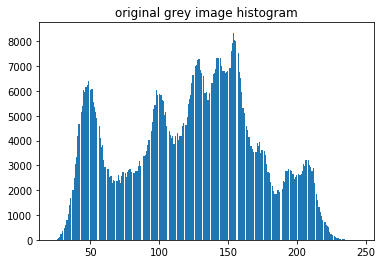

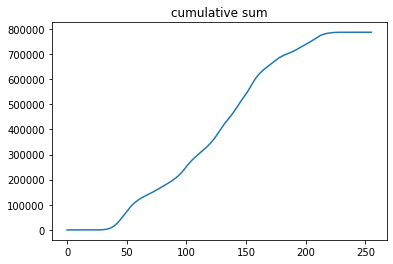

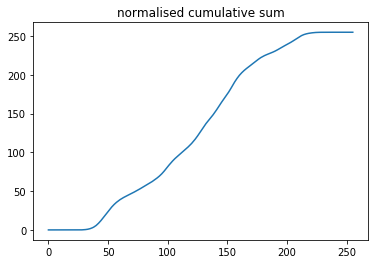

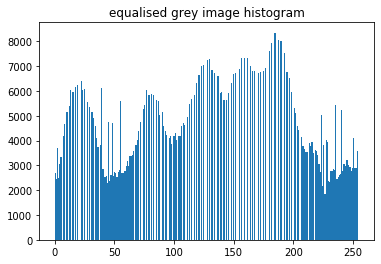

True

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

img = cv2.imread('lena.tiff')
height, width, channel = img.shape

#re-order color channels from bgr to rgb
b,g,r = cv2.split(img)  
outputImg = cv2.merge([r,g,b])  

#access pixel grid from 0,0 to height,width, then alter their RGB values to get grey image
for i in range(0,height):
    for j in range(0,width):
        #0=red channel, 1=green channel, 2=blue channel
        y = outputImg[i,j,0]*0.299 + outputImg[i,j,1]*0.587 + outputImg[i,j,2]*0.114
        outputImg[i,j,:] = y

#outputImg is the grey image that's going to be modified by histogram equalisation
#show and write png file of original histogram of the grey image with 256 bins
plt.hist(outputImg.flatten(), 256)
plt.title('original grey image histogram')
plt.savefig('original grey image histogram.png')
plt.show()
hist, bins = np.histogram(outputImg, 256, [0, 256])

#find cumulative sum of the histogram
cumSum = np.zeros(256)
for i in range(len(hist)):
    cumSum[i] = cumSum[i-1] + hist[i]
    
#plot and show function, then write png file
plt.plot(cumSum)
plt.title('cumulative sum')
plt.savefig('cumulative sum.png')
plt.show()

#normalise cumulative Sum
normCumSum = np.zeros_like(cumSum) 
normCumSum = 255*(cumSum-0)/(cumSum.max()-cumSum.min())

#plot and show function, then write png file
plt.plot(normCumSum)
plt.title('normalised cumulative sum')
plt.savefig('normalised cumulative sum.png')
plt.show()

#apply equalisation using normalised cumulative distribution function
outputImgEq = np.zeros_like(outputImg)
for i in range(0, height):
    for j in range(0, width):
        outputImgEq[i, j] = normCumSum[outputImg[i, j]]
        
#show and write png file of histogram of equalised grey image with 256 bins
plt.hist(outputImgEq.flatten(), 256)
plt.title('equalised grey image histogram')
plt.savefig('equalised grey image histogram.png')
plt.show()

#show output images
cv2.imshow('original image', img)
cv2.imshow('grey image', outputImg)
cv2.imshow('grey image equalised', outputImgEq)
cv2.waitKey()
cv2.destroyAllWindows()

#write output png files
cv2.imwrite('grey_img.png', outputImg)
cv2.imwrite('grey_img_equalised.png', outputImgEq)